In [202]:
import pandas as pd
import random
import itertools
import cv2
from matplotlib import pyplot as plt
import os
from scipy import stats

In [180]:
path_photos = "../../../Dataset/img_celeba/" 
celeb_identity = pd.read_csv("../../../Dataset/identity_CelebA.txt", 
                             sep = " ", names=["image", "identity"])
celeb_identity["identity"] = celeb_identity["identity"].astype("string")
celeb_identity

image identity
0       000001.jpg     2880
1       000002.jpg     2937
2       000003.jpg     8692
3       000004.jpg     5805
4       000005.jpg     9295
...            ...      ...
202594  202595.jpg     9761
202595  202596.jpg     7192
202596  202597.jpg     9852
202597  202598.jpg     5570
202598  202599.jpg    10101

[202599 rows x 2 columns]

In [227]:
celeb_attrs = pd.read_csv("../../../Dataset/list_attr_celeba.txt", 
                             sep = "\s+")
celeb_attrs

image  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                -1                1           1   
1       000002.jpg                -1               -1          -1   
2       000003.jpg                -1               -1          -1   
3       000004.jpg                -1               -1           1   
4       000005.jpg                -1                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                -1               -1           1   
202595  202596.jpg                -1               -1          -1   
202596  202597.jpg                -1               -1          -1   
202597  202598.jpg                -1                1           1   
202598  202599.jpg                -1                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  \
0                    -1    -1     -1        -1        -1          -1  ...   
1                     1    -1     -1        -1         1          -1  ...   
2                    -1    -1     -1         1        -1          -1  ...   
3                    -1    -1     -1        -1        -1          -1  ...   
4                    -1    -1     -1         1        -1          -1  ...   
...                 ...   ...    ...       ...       ...         ...  ...   
202594               -1    -1     -1         1        -1          -1  ...   
202595               -1    -1      1         1        -1          -1  ...   
202596               -1    -1     -1        -1        -1           1  ...   
202597               -1    -1     -1         1        -1           1  ...   
202598               -1    -1     -1        -1        -1          -1  ...   

        Sideburns  Smiling  Straight_Hair  Wavy_Hair  Wearing_Earrings  \
0              -1        1              1         -1                 1   
1              -1        1             -1         -1                -1   
2              -1       -1             -1          1                -1   
3              -1       -1              1         -1                 1   
4              -1       -1             -1         -1                -1   
...           ...      ...            ...        ...               ...   
202594         -1       -1             -1         -1                -1   
202595         -1        1              1         -1                -1   
202596         -1        1             -1         -1                -1   
202597         -1        1             -1          1                 1   
202598         -1       -1             -1          1                -1   

        Wearing_Hat  Wearing_Lipstick  Wearing_Necklace  Wearing_Necktie  \
0                -1                 1                -1               -1   
1                -1                -1                -1               -1   
2                -1                -1                -1               -1   
3                -1                 1                 1               -1   
4                -1                 1                -1               -1   
...             ...               ...               ...              ...   
202594           -1                 1                -1               -1   
202595           -1                -1                -1               -1   
202596           -1                -1                -1               -1   
202597           -1                 1                -1               -1   
202598           -1                 1                -1               -1   

        Young  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
202594      1  
202595      1  
202596      1  
202597      1  
202598      1  

[202599 rows x 41 columns]

In [226]:
def get_balanced_pair(column:str, pairing_column:str, df=celeb_identity)->dict:
    # getting random identity from the provided column to use for balanced pair
    random_id = df[column].sample(1).to_string(index=False)
    containing_id_list = df.loc[df[column] == random_id][pairing_column].sample(2).to_list()
    
    # random pictures for pair generation
    df_without_id = df.loc[df[pairing_column] != random_id]
    pairing_list = df[pairing_column].sample(2).to_list()
    
    return {random_id : [{containing_id_list[0] : 1, pairing_list[0] : 0},
                        {containing_id_list[1] : 1, pairing_list[1] : 0}]}
    

In [197]:
gen_test = get_balanced_pair("identity", "image")
gen_test

{'4540': [{'086255.jpg': 1, '084272.jpg': 0},
  {'105086.jpg': 1, '159483.jpg': 0}]}

In [282]:
def balanced_pair_gen(pairs_no):
    """ Generator function for balanced pairs. Takes the number of pairs you want to create"""
    for i in range(pairs_no):
        record = get_balanced_pair("identity", "image")
        yield record

In [199]:
generate10 = balanced_pair_gen(10)

In [138]:
for record in generate10:
    print(record)

{'370': [{'012085.jpg': 1, '151712.jpg': 0}, {'008901.jpg': 1, '135362.jpg': 0}]}
{'2444': [{'079820.jpg': 1, '095254.jpg': 0}, {'089180.jpg': 1, '191629.jpg': 0}]}
{'3589': [{'164801.jpg': 1, '112220.jpg': 0}, {'176228.jpg': 1, '130545.jpg': 0}]}
{'5692': [{'092990.jpg': 1, '122360.jpg': 0}, {'158226.jpg': 1, '089178.jpg': 0}]}
{'2600': [{'172810.jpg': 1, '157592.jpg': 0}, {'167720.jpg': 1, '080482.jpg': 0}]}
{'4410': [{'092040.jpg': 1, '051867.jpg': 0}, {'115781.jpg': 1, '059398.jpg': 0}]}
{'759': [{'181258.jpg': 1, '156013.jpg': 0}, {'164317.jpg': 1, '172891.jpg': 0}]}
{'1361': [{'058099.jpg': 1, '007441.jpg': 0}, {'047242.jpg': 1, '040472.jpg': 0}]}
{'4335': [{'166678.jpg': 1, '188840.jpg': 0}, {'178536.jpg': 1, '049243.jpg': 0}]}


In [200]:
pic_test = next(generate10)

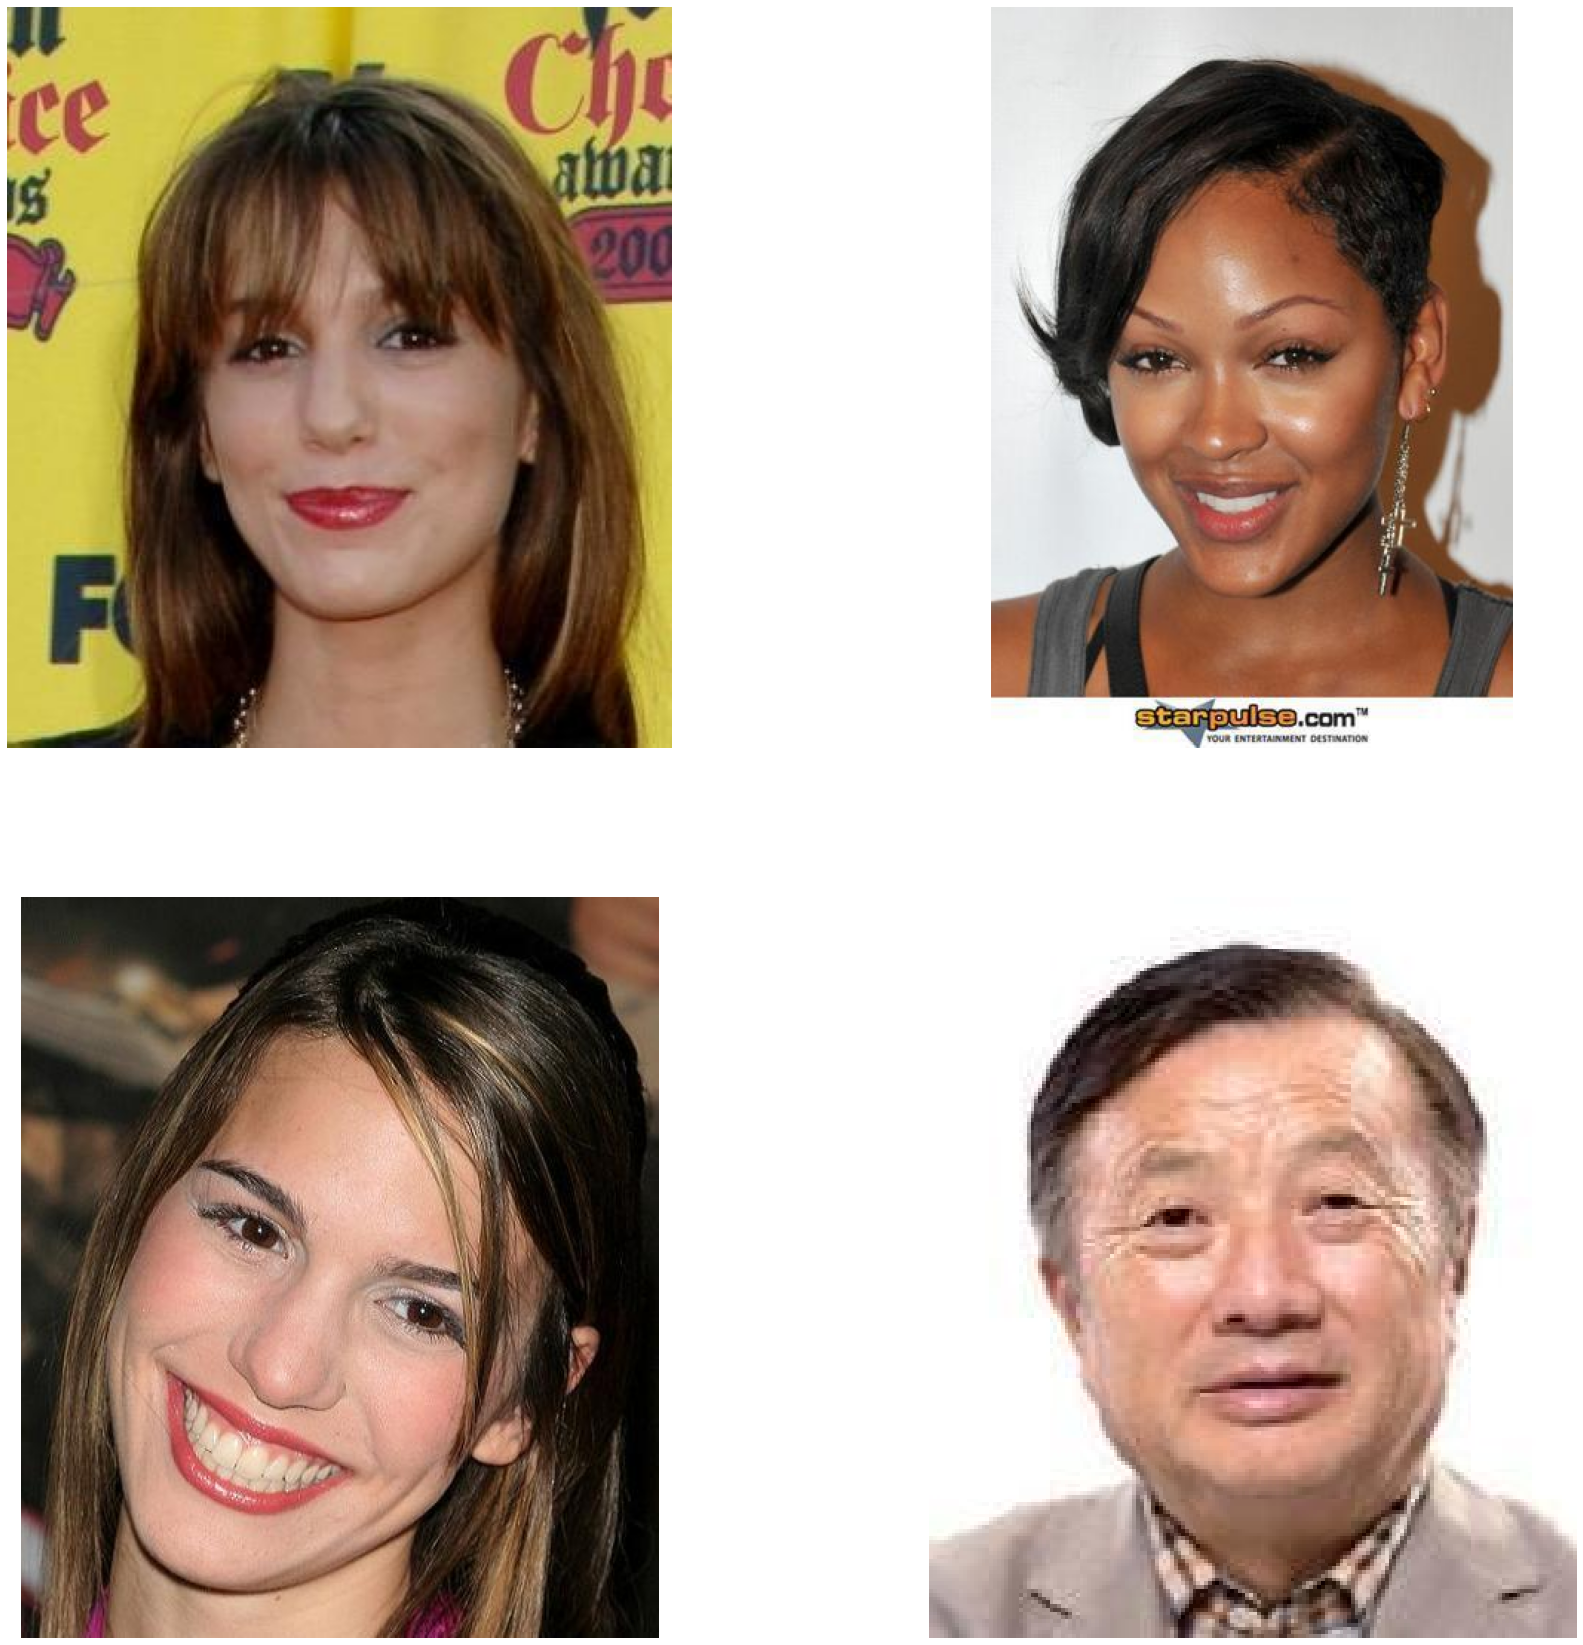

In [201]:
# Test - are the pictures that are supposed to be the same person actually the same person
# and the others difference
i=1
plt.figure(figsize=(30,30))
for id_list in pic_test.values():
    for pic_dict in id_list:
        pic_dict_keys = pic_dict.keys()
        image_id_person = cv2.imread(os.path.join(path_photos, list(pic_dict_keys)[0]))
        image_random_person = cv2.imread(os.path.join(path_photos, list(pic_dict_keys)[1]))
        plt.subplot(2, 2, i)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(image_id_person, cv2.COLOR_BGR2RGB))
        
        plt.subplot(2, 2, i+1)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(image_random_person, cv2.COLOR_BGR2RGB))
        i += 2

In [263]:
def get_pearson_corr(column, df=celeb_attrs):
    """ Calculates correlation based of all the other columns"""
    corr_df = pd.DataFrame(columns=["corr", "p"])
    for col in df.columns[1:]:
        try:
            if col != column:
                corr, p = stats.pearsonr(df[column], df[col])
                corr_df.loc[col] = [corr, round(p, 3)]
        except Exception as e:
            print(f"Unable to calculate correlation for the selected column {column}\n{e}")
    return corr_df

In [264]:
corr_test = get_pearson_corr("Smiling")
corr_test_correct_p = corr_test.loc[corr_test["p"] < 0.05] 
corr_test_correct_p

corr      p
Black_Hair      -0.002533  0.254
Bushy_Eyebrows  -0.002924  0.188
Wearing_Necktie -0.002245  0.312

In [286]:
# function to find attributes based on given identity 000005.jpg
skuska = celeb_attrs.loc[celeb_attrs["image"] == "000005.jpg"]
skuska = list(skuska.columns[(skuska == 1).any()])
#skuska_sample = random.sample(skuska, 1)[0]
#skuska_sample
skuska

['Arched_Eyebrows',
 'Attractive',
 'Big_Lips',
 'Heavy_Makeup',
 'Narrow_Eyes',
 'No_Beard',
 'Pointy_Nose',
 'Wearing_Lipstick',
 'Young']

In [267]:
min_corr_test = min(corr_test["corr"])
min_corr_test
skuskolinka = corr_test.loc[corr_test["corr"] == min(corr_test["corr"])].index[0]
skuskolinka

'Male'

In [269]:
males = celeb_attrs.loc[celeb_attrs[skuskolinka] == 1]
males["image"].sample(1).to_string(index=False)

'143929.jpg'

In [287]:
def get_bp_using_attrs(column:str, pairing_column:str, df=celeb_identity, df_attrs=celeb_attrs,
                      attrs_column = "image")->dict:
    results = []
    i = 1
    # getting random identity from the provided column to use for balanced pair
    random_id = df[column].sample(1).to_string(index=False)
    containing_id_list = df.loc[df[column] == random_id][pairing_column].sample(2).to_list()
    # find relevant attributes for the randomly selected identity 
    for image in containing_id_list:
        if i == 1:
            try:
                id_attrs = df_attrs.loc[df_attrs[attrs_column] == image]
                id_attrs_list = list(id_attrs.columns[(id_attrs == 1).any()])
                # Select one random attribute for which we calculate correlation
                selected_attribute = random.sample(id_attrs_list, 1)[0]
                corr_df = get_pearson_corr(selected_attribute, df=df_attrs)
                # filtering statistically significant results 
                corr_passed_test = corr_df.loc[corr_df["p"] < 0.05] 
                # finding the attribute with the highest correlation to the randomly selected attribute of our identity
                max_corr_attr = corr_passed_test.loc[corr_passed_test["corr"] == max(corr_passed_test["corr"])].index[0]
                max_corr_attr_df = df_attrs.loc[df_attrs[max_corr_attr] == 1]
                # Make sure there is no chance we get the image of the same person
                max_corr_attr_df = max_corr_attr_df.loc[max_corr_attr_df[pairing_column] != random_id]
                max_corr_image = max_corr_attr_df[pairing_column].sample(1).to_string(index=False)
                # Appending the resulting images to results
                results.append({image : 1, max_corr_image : 0})        
            except Exception as e:
                print(f"Unable to find image matching the max correlation attribute\n{e}")
            
        else:
            try:
                id_attrs = df_attrs.loc[df_attrs[attrs_column] == image]
                id_attrs_list = list(id_attrs.columns[(id_attrs == 1).any()])
                # Select one random attribute for which we calculate correlation
                selected_attribute = random.sample(id_attrs_list, 1)[0]
                corr_df = get_pearson_corr(selected_attribute, df=df_attrs)
                # filtering statistically significant results 
                corr_passed_test = corr_df.loc[corr_df["p"] < 0.05] 
                # finding the attribute with the smallest correlation to the randomly selected attribute of our identity
                min_corr_attr = corr_passed_test.loc[corr_passed_test["corr"] == min(corr_passed_test["corr"])].index[0]
                min_corr_attr_df = df_attrs.loc[df_attrs[max_corr_attr] == 1]
                # Make sure there is no chance we get the image of the same person
                min_corr_attr_df = max_corr_attr_df.loc[max_corr_attr_df[pairing_column] != random_id]
                min_corr_image = max_corr_attr_df[pairing_column].sample(1).to_string(index=False)
                # Appending the resulting images to results
                results.append({image : 1, min_corr_image : 0})        
            except Exception as e:
                print(f"Unable to find image matching the min correlation attribute\n{e}")

    return {random_id : results}

In [292]:
def bp_w_attr_gen(pairs_no):
    """ Generator function for balanced pairs. Takes the number of pairs you want to create"""
    for i in range(pairs_no):
        record = get_bp_using_attrs("identity", "image")
        yield record

In [299]:
generate10 = bp_w_attr_gen(10)

In [302]:
pic_test = next(generate10)

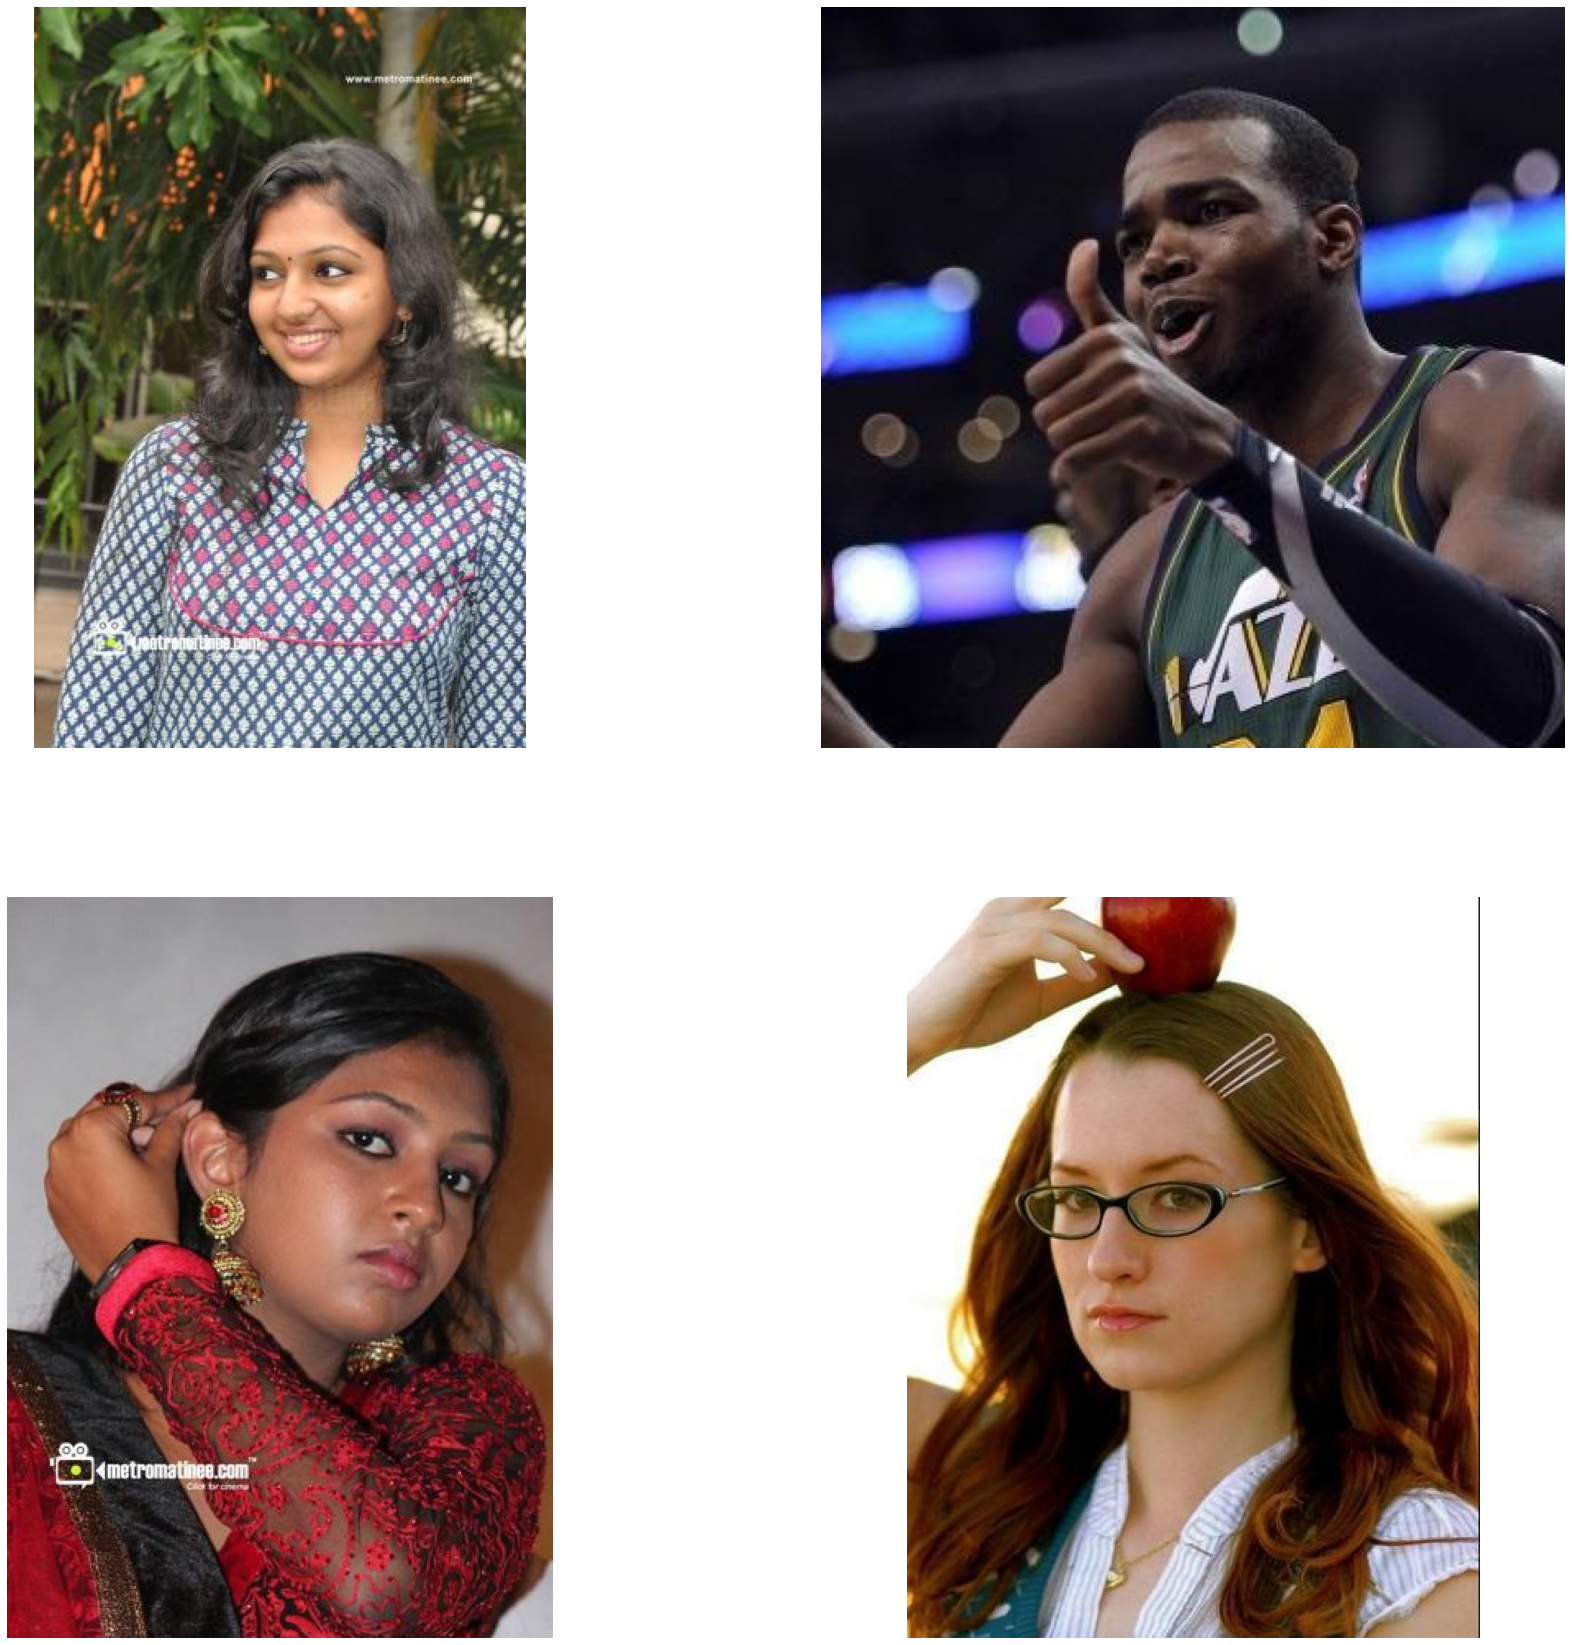

In [303]:
i=1
plt.figure(figsize=(30,30))
for id_list in pic_test.values():
    for pic_dict in id_list:
        pic_dict_keys = pic_dict.keys()
        image_id_person = cv2.imread(os.path.join(path_photos, list(pic_dict_keys)[0]))
        image_random_person = cv2.imread(os.path.join(path_photos, list(pic_dict_keys)[1]))
        plt.subplot(2, 2, i)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(image_id_person, cv2.COLOR_BGR2RGB))
        
        plt.subplot(2, 2, i+1)
        plt.axis("off")
        plt.imshow(cv2.cvtColor(image_random_person, cv2.COLOR_BGR2RGB))
        i += 2